In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report,auc,roc_curve
from sklearn.preprocessing import StandardScaler


In [2]:
# Importing classifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [3]:
df=pd.read_csv('/content/dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/dataset.csv'

In [ ]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.sample(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
963,60,1,4,125,258,0,2,141,1,2.8,2,1
834,51,1,3,94,227,0,0,154,1,0.0,1,0
716,50,0,2,120,244,0,0,162,0,1.1,1,0
964,51,0,3,140,308,0,2,142,0,1.5,1,0
513,35,1,3,123,161,0,1,153,0,-0.1,1,0


In [ ]:
df.shape

(1190, 12)

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


## Univariate analysis

### Subtask:
Plot the distribution of each feature.


**Reasoning**:
Iterate through each column and plot a histogram for each feature to visualize its distribution.



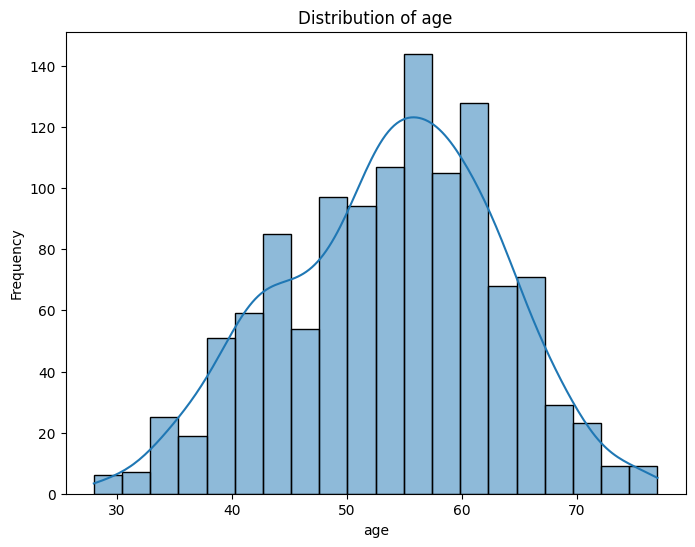

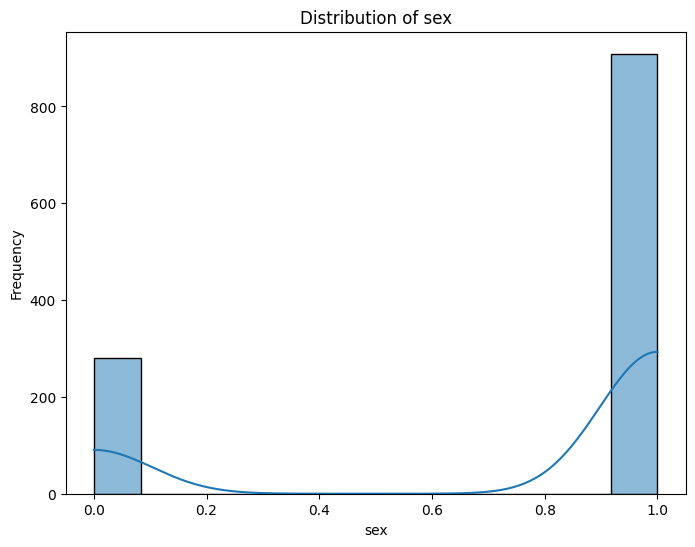

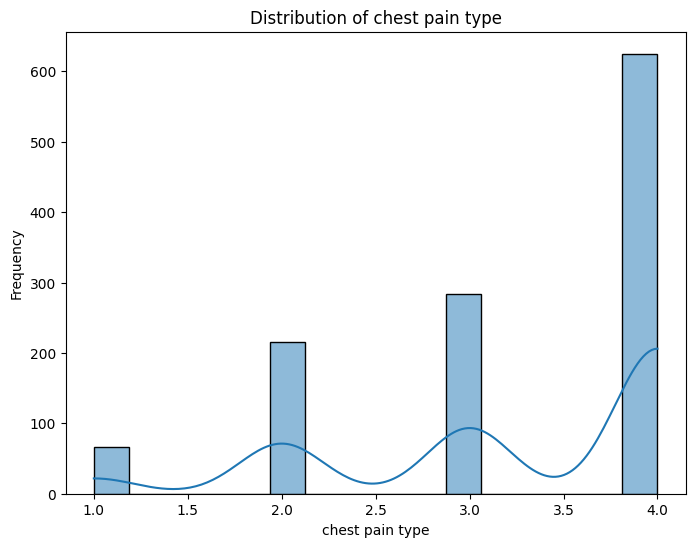

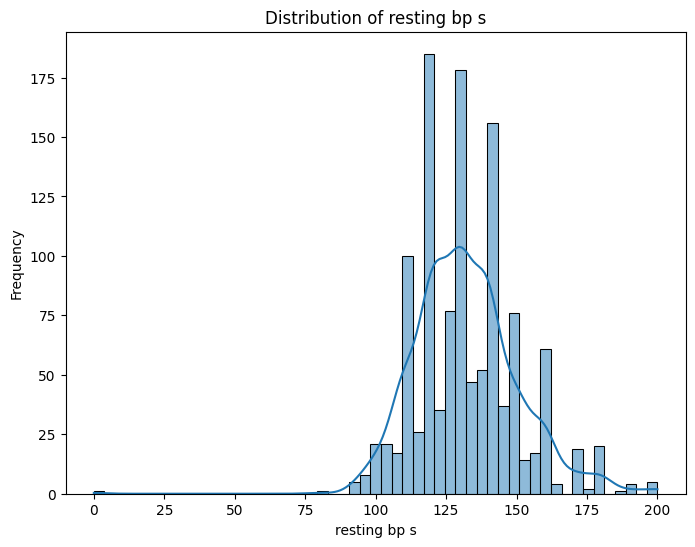

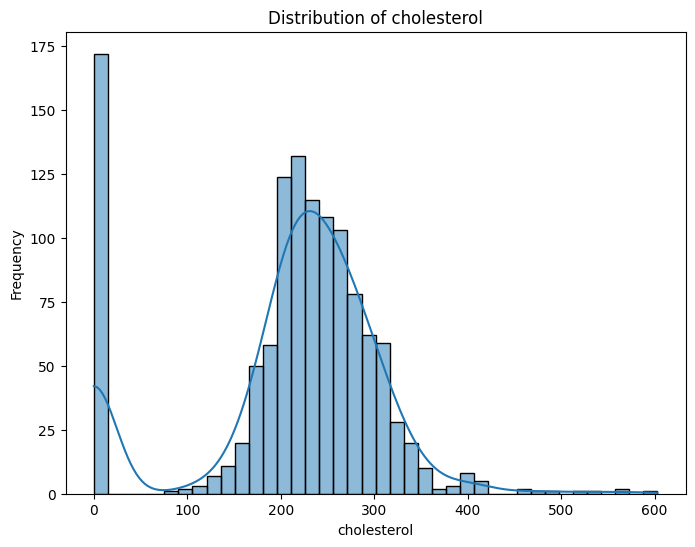

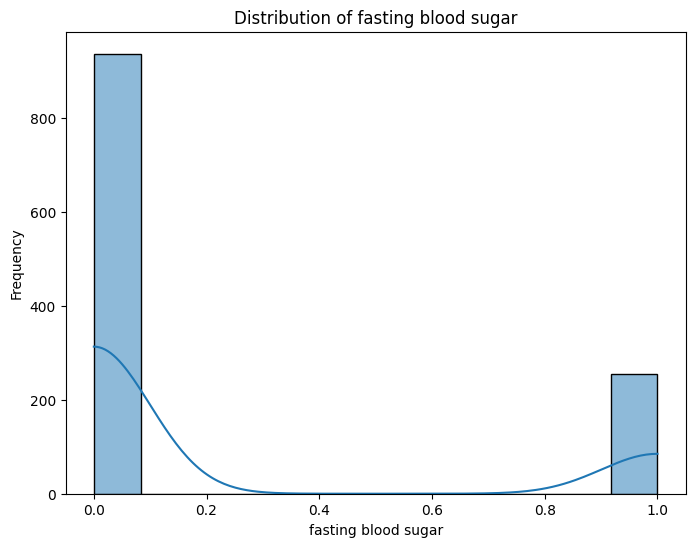

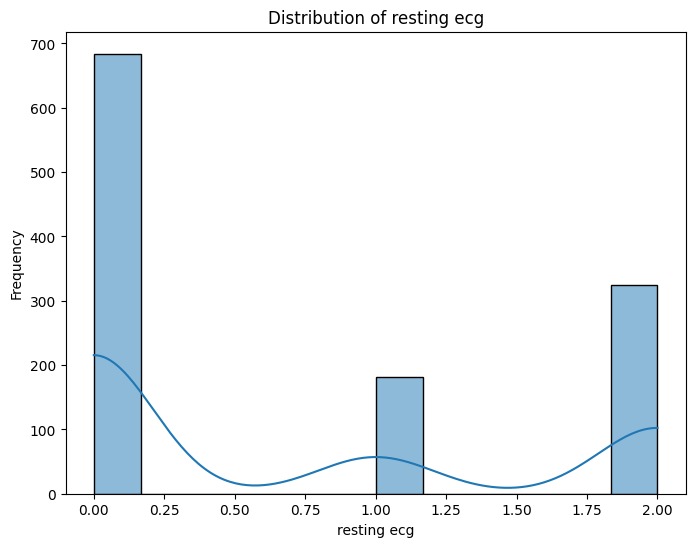

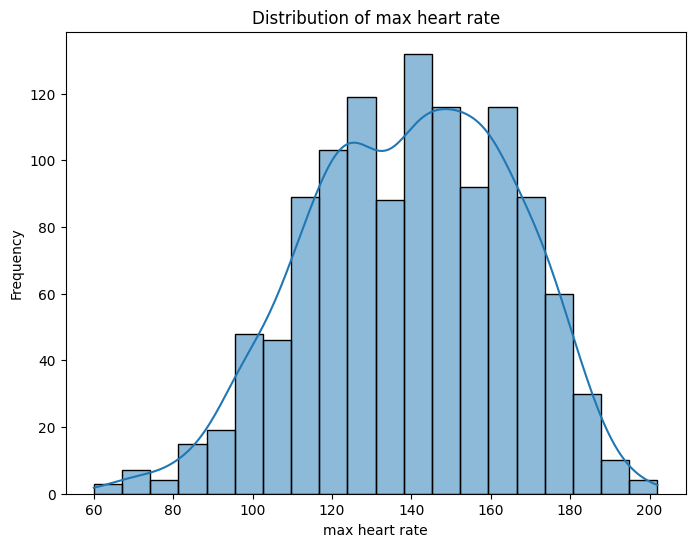

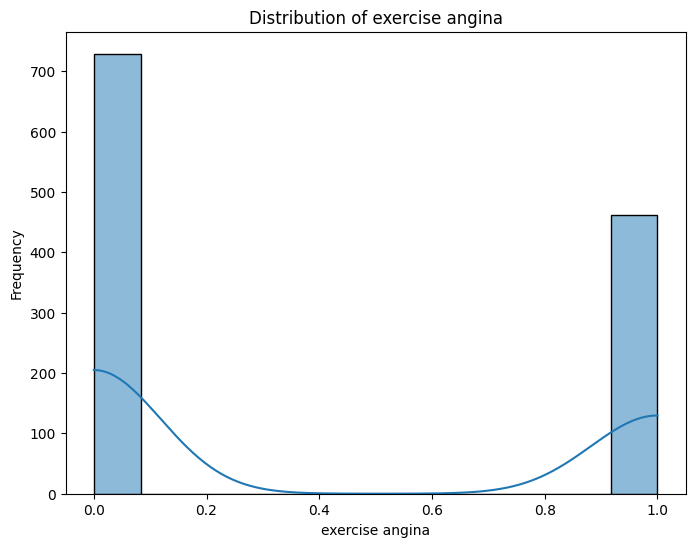

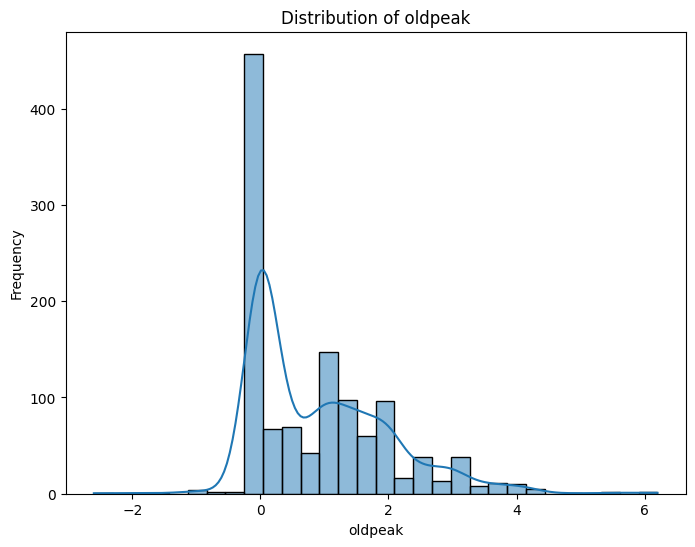

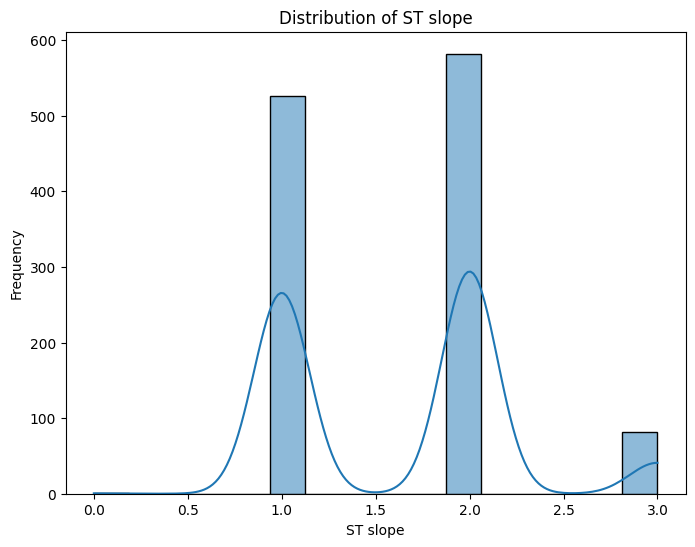

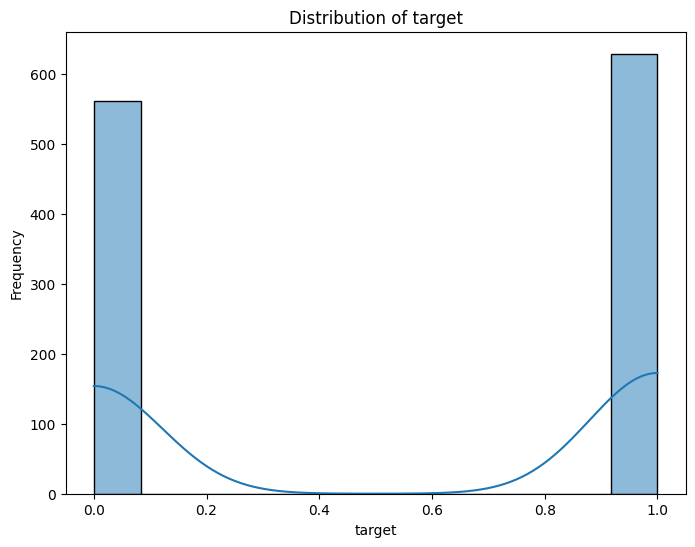

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Bivariate analysis

### Subtask:
Visualize the relationships between pairs of features and the target variable.


**Reasoning**:
Iterate through each feature and create a scatter plot with the target variable to visualize their relationship.



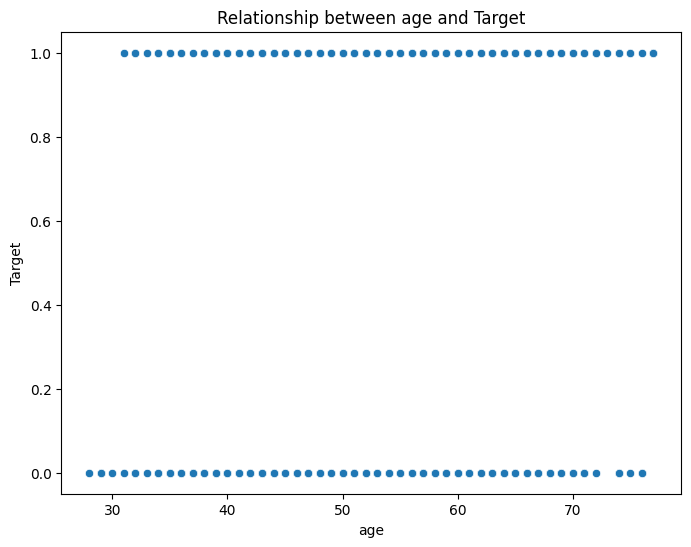

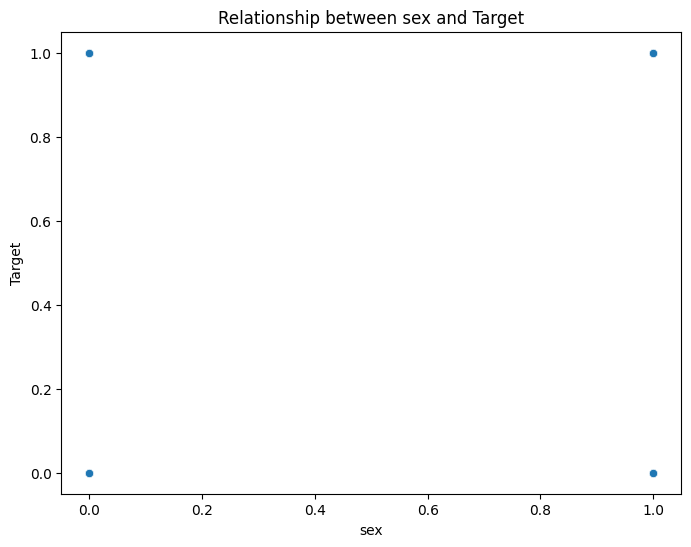

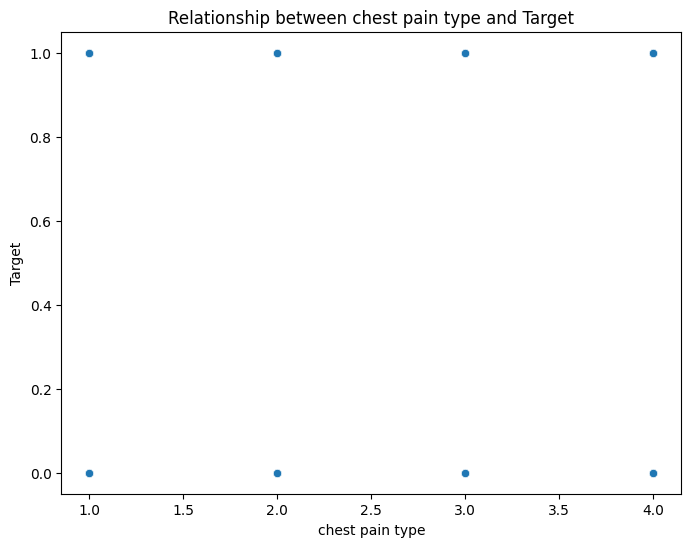

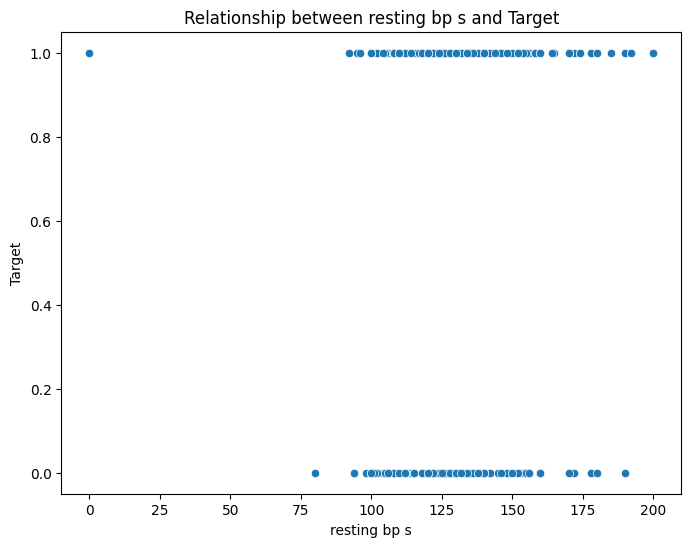

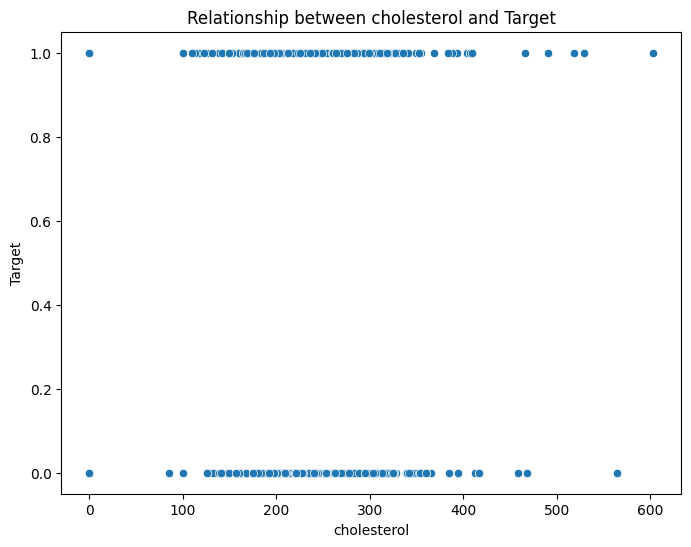

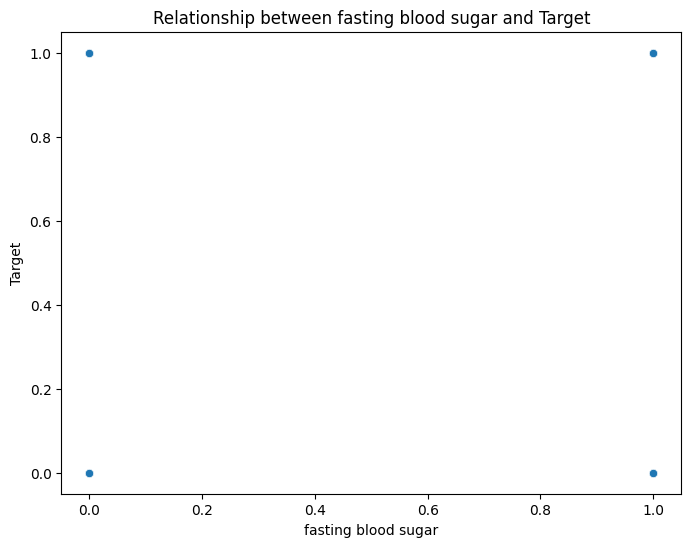

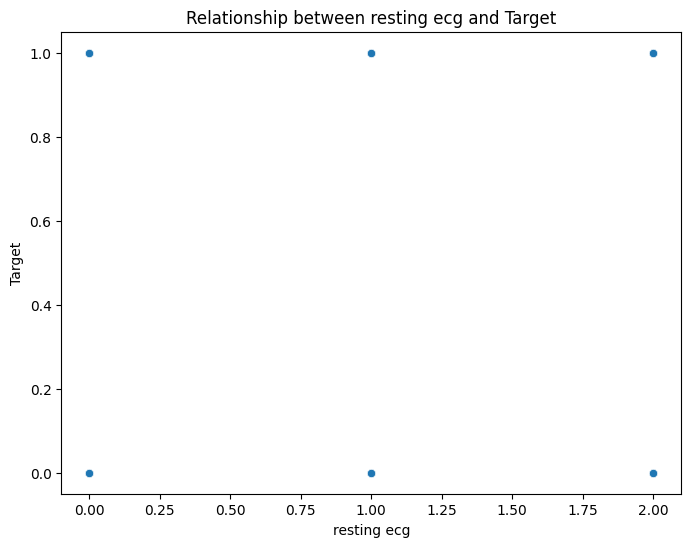

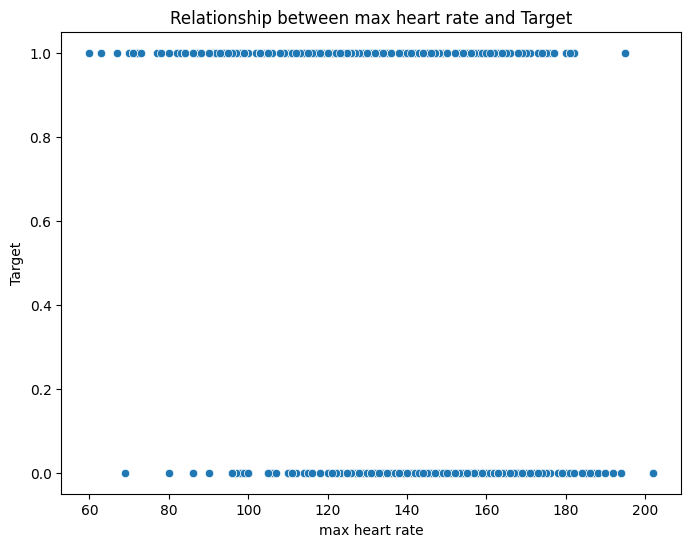

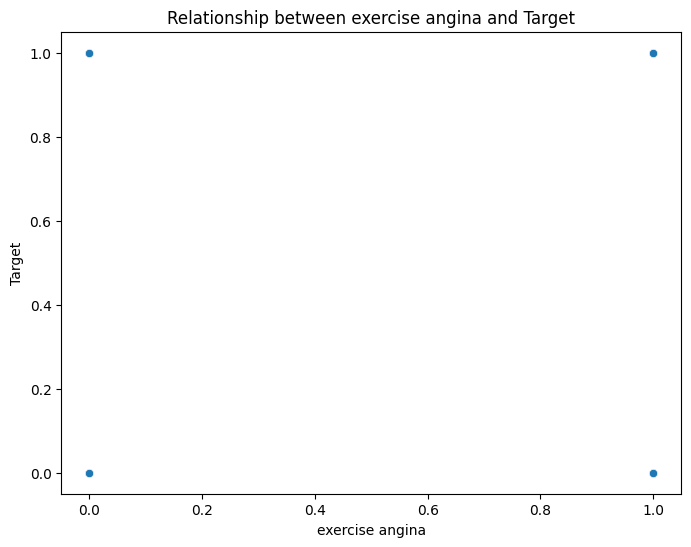

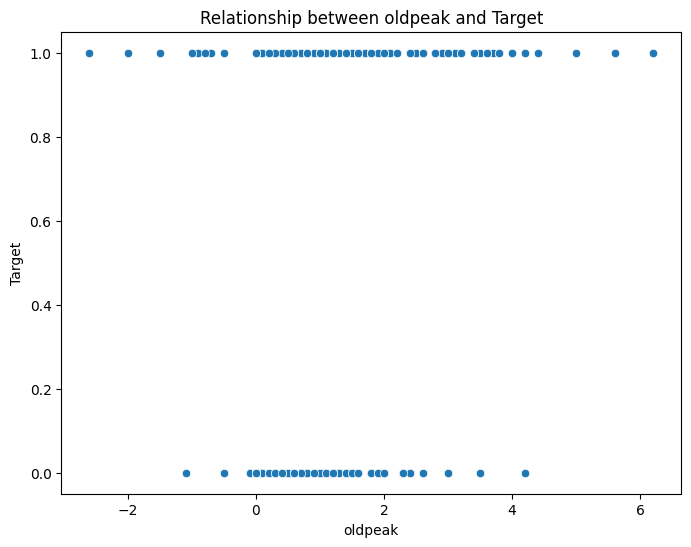

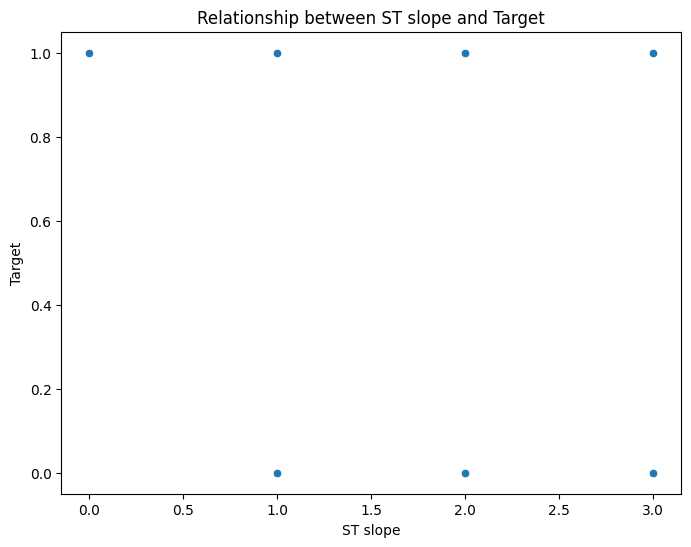

In [ ]:
for column in df.columns:
    if column != 'target':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=column, y='target')
        plt.title(f'Relationship between {column} and Target')
        plt.xlabel(column)
        plt.ylabel('Target')
        plt.show()

## Correlation analysis

### Subtask:
Calculate and visualize the correlation matrix to understand the linear relationships between features.


**Reasoning**:
Calculate and visualize the correlation matrix to understand the linear relationships between features.



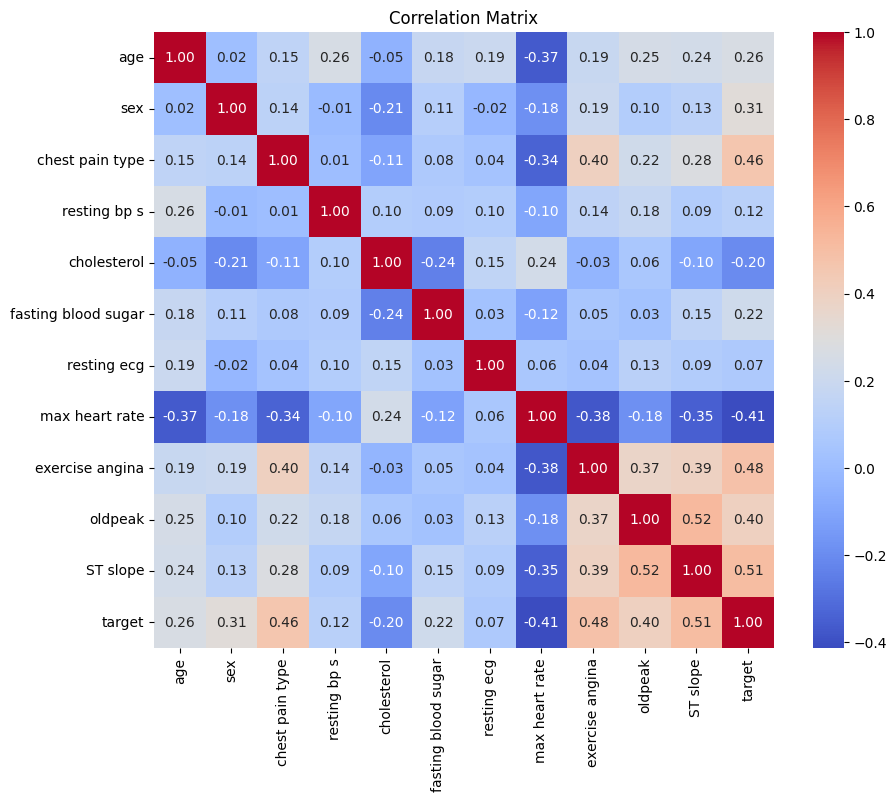

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

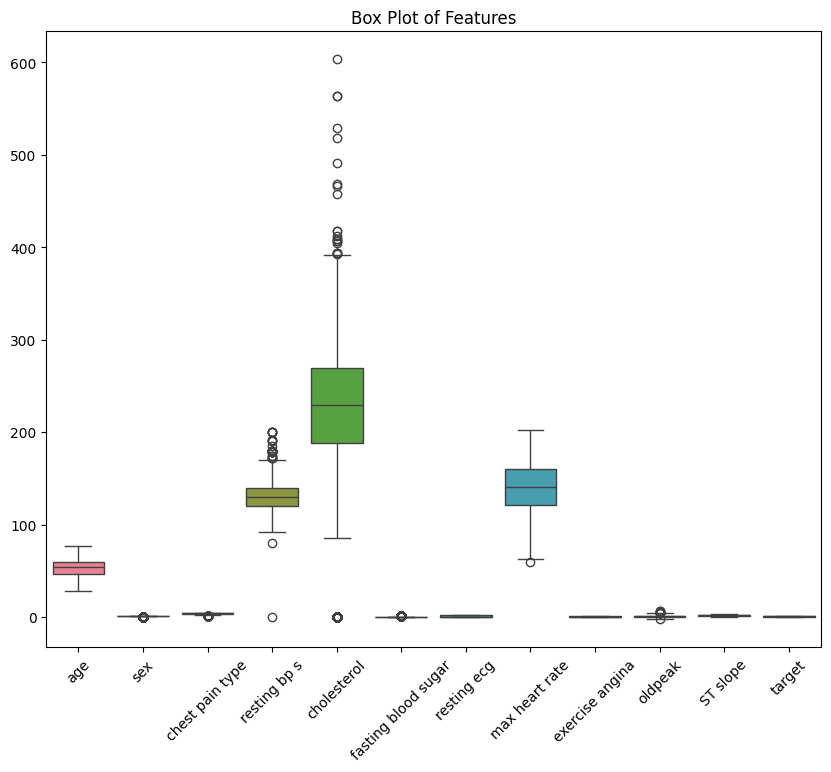

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

Shape of original data: (1190, 12)
Shape of data after removing outliers: (559, 12)


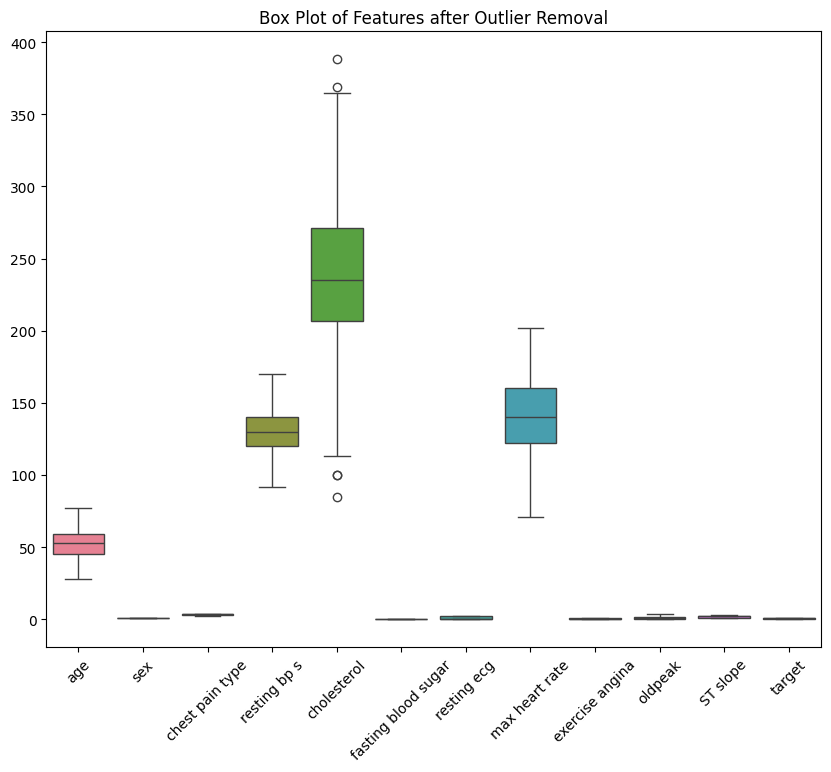

In [ ]:

import matplotlib.pyplot as plt
# Removing outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR)
threshold = 1.5

# Identify outliers
outliers = df[(df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))]

# Remove outliers
df_cleaned = df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

print("Shape of original data:", df.shape)
print("Shape of data after removing outliers:", df_cleaned.shape)

# Display box plot after removing outliers
plt.figure(figsize=(10,8))
sns.boxplot(data=df_cleaned)
plt.title('Box Plot of Features after Outlier Removal')
plt.xticks(rotation=45)
plt.show()

In [ ]:
x=df_cleaned.drop('target',axis=1)
y=df_cleaned['target']

In [ ]:
x

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
2,37,1,2,130,283,0,1,98,0,0.0,1
4,54,1,3,150,195,0,0,122,0,0.0,1
5,39,1,3,120,339,0,0,170,0,0.0,1
7,54,1,2,110,208,0,0,142,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1179,44,1,4,120,169,0,0,144,1,2.8,3
1180,63,1,4,140,187,0,2,144,1,4.0,1
1182,41,1,2,120,157,0,0,182,0,0.0,1
1187,57,1,4,130,131,0,0,115,1,1.2,2


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
X_train.shape

(447, 11)

In [ ]:
# ===== MODEL TRAINING =====
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5,
                                          min_samples_leaf=3, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10,
                                          min_samples_split=5, random_state=42,class_weight='balanced'),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                            random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

In [ ]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    precision_recall_curve, auc, f1_score
)

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    report = classification_report(y_test, y_pred)

    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score (Class 1): {f1:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")
    print("Classification Report:\n", report)

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'pr_auc': pr_auc,
        'report': report
    }


Training Logistic Regression...

Logistic Regression Performance:
Accuracy: 0.8304
F1-score (Class 1): 0.8527
PR AUC: 0.8984
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        49
           1       0.83      0.87      0.85        63

    accuracy                           0.83       112
   macro avg       0.83      0.82      0.83       112
weighted avg       0.83      0.83      0.83       112


Training Decision Tree...

Decision Tree Performance:
Accuracy: 0.8214
F1-score (Class 1): 0.8462
PR AUC: 0.8902
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        49
           1       0.82      0.87      0.85        63

    accuracy                           0.82       112
   macro avg       0.82      0.81      0.82       112
weighted avg       0.82      0.82      0.82       112


Training Random Forest...

Random Forest Performance:
Acc